# Task 01 : Prediction using Supervised ML

# Predict the percentage of an student based on the no. of study hours

## by - Tejas Lanjekar

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Importing the data

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Reviewing the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Checking the correlation between the rows

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data Visualization

### Visualization with line plot

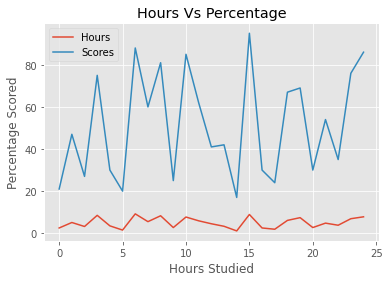

In [7]:
plt.style.use('ggplot')
df.plot(kind='line')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

### Data visualization with area plot

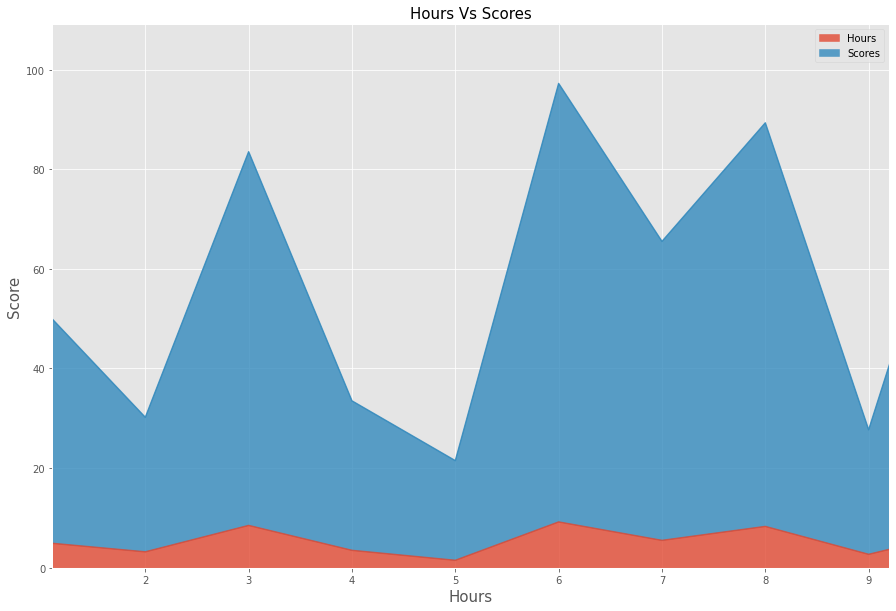

In [8]:
xmin = min(df.Hours)
xmax = max(df.Hours)
df.plot(kind='area', alpha=0.8, stacked=True, figsize=(15,10), xlim=(xmin,xmax))
plt.title('Hours Vs Scores', size=15)
plt.xlabel('Hours', size=15)
plt.ylabel('Score', size=15)
plt.show()

### Data Visualization with Scatter Plot

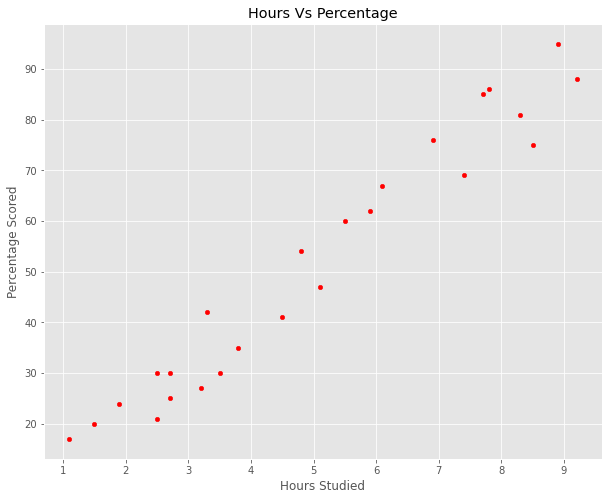

In [9]:
df.plot(kind='scatter', x='Hours', y='Scores', color='r', figsize=(10,8))
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

## After Visualization we come to conclusion that we can solve this proble by Linear Regression

### Modeling the data

In [10]:
x = np.asanyarray(df[['Hours']])
y = np.asanyarray(df[['Scores']])

#Splitting the data for training and testing
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)
regressor = LinearRegression()
regressor.fit(train_x,train_y)

print("Training Complete\n")
print('coehhicient: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

Training Complete

coehhicient:  [[9.94061514]]
Intercept:  [1.50791048]


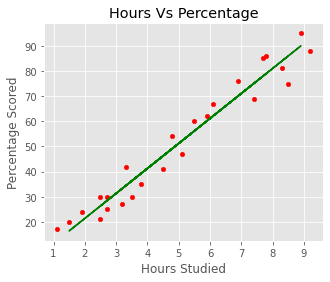

In [11]:
df.plot(kind='scatter', x='Hours', y='Scores', figsize=(5,4),color='r')
plt.plot(train_x, regressor.coef_[0]*train_x + regressor.intercept_, color='g')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

## Evaluation of Model

In [12]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred=regressor.predict(test_x)
print('Mean Absolute Error : {}'.format(metrics.mean_absolute_error(y_pred,test_y)))
print("R2 score : %.2f" % r2_score(y_pred, test_y))

Mean Absolute Error : 4.877039354964484
R2 score : 0.98


## Predicting the Scores

In [13]:
hours = 9.25
predicted_score = regressor.predict([[hours]])
print(f'No of hours = {hours}')
print(f'predicted Score = {predicted_score[0]}')

No of hours = 9.25
predicted Score = [93.45860056]
